In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Real estate valuation data set.csv')
df.head(10)

,No,X1-Date,X2-House-Age,X3-D-MRT,X4-Stores,X5-Lat,X6-Lon,Y-Price/Area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


#### Remove the index column as it's not needed.

In [170]:
df.drop(['No'],axis=1, inplace=True)
df.describe()

,X1-Date,X2-House-Age,X3-D-MRT,X4-Stores,X5-Lat,X6-Lon,Y-Price/Area
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,2013.148525,17.729298,1085.898530,4.101695,24.969017,121.533368,37.787651
std,0.282163,11.401205,1262.974876,2.945182,0.012422,0.015365,13.046097
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.000000,289.324800,1.000000,24.962990,121.527600,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.400000
75%,2013.417000,28.200000,1455.798000,6.000000,24.977460,121.543310,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,78.300000


#### The info method tells us if we have any cleaning to do (We don't)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   X1-Date       413 non-null    float64
 1   X2-House-Age  413 non-null    float64
 2   X3-D-MRT      413 non-null    float64
 3   X4-Stores     413 non-null    int64  
 4   X5-Lat        413 non-null    float64
 5   X6-Lon        413 non-null    float64
 6   Y-Price/Area  413 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.7 KB


#### Visualize purchase date vs price/area
#### Y is roughly normally distributed with outlier at 120


<AxesSubplot:xlabel='Y-Price/Area', ylabel='Count'>

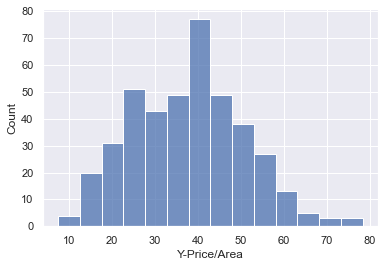

In [172]:
sns.set(color_codes=True)
sns.histplot(df['Y-Price/Area'])

C:\Users\goatl\Anaconda3\envs\Routing\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X1-Date', ylabel='Y-Price/Area'>

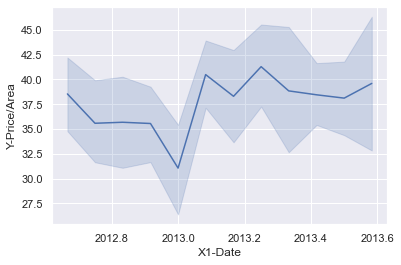

In [173]:
sns.lineplot(df['X1-Date'],df['Y-Price/Area'])

#### First overview shows that strong negative correlation between X3 and price

<AxesSubplot:>

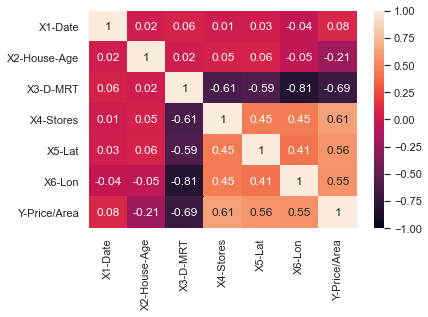

In [174]:
correlation_matrix = df.corr().round(2)
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True)

#### Homes near the outskirts are worth less than homes near the center

<AxesSubplot:xlabel='X6-Lon', ylabel='X5-Lat'>

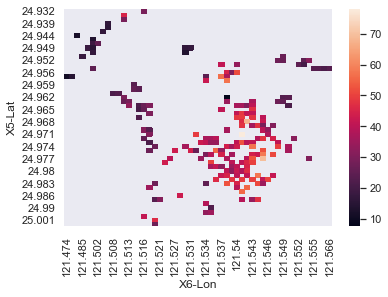

In [175]:
YperLocation = df
YperLocation = YperLocation.round({'X5-Lat' : 3, 'X6-Lon' : 3})
YperLocation = YperLocation.pivot_table(index='X5-Lat', columns='X6-Lon', values='Y-Price/Area')
sns.heatmap(YperLocation)

#### Distance to nearest MRT (Train station) strong correlation with Y

<AxesSubplot:xlabel='X3-D-MRT', ylabel='Y-Price/Area'>

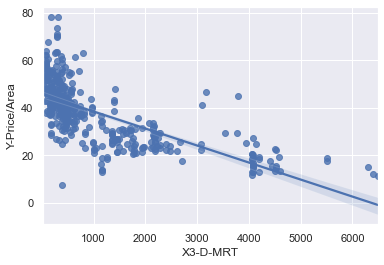

In [176]:
sns.regplot(y=df['Y-Price/Area'], x=df['X3-D-MRT'])

### Some analysis

In [177]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.drop(labels='Y-Price/Area', axis=1)
y = df['Y-Price/Area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

print(X_test.head())
print()
print(y_test.head())

      X1-Date  X2-House-Age   X3-D-MRT  X4-Stores    X5-Lat     X6-Lon
128  2013.083          41.3   124.9912          6  24.96674  121.54039
240  2013.083          11.0  1712.6320          2  24.96412  121.51670
373  2013.250           5.4   390.5684          5  24.97937  121.54245
216  2013.250          37.8   590.9292          1  24.97153  121.53559
342  2013.000          33.5   563.2854          8  24.98223  121.53597

128    60.7
240    28.8
373    49.5
216    39.7
342    46.6
Name: Y-Price/Area, dtype: float64


#### Train the model and test it on the X_test, y_test

In [178]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_prediction = regr.predict(X_test)
print(len(y_prediction))
print(len(X_test))

83
83


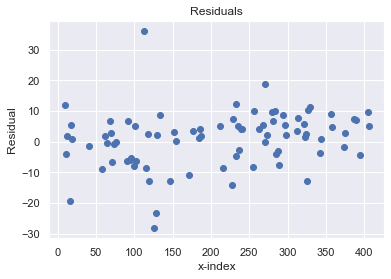

In [179]:
dif = y_prediction - y_test
plt.scatter(X_test.index,dif , label='Predicted')
plt.title("Residuals")
plt.ylabel("Residual")
plt.xlabel("x-index")
plt.show()

0.5310167764473281 82.0921618466787


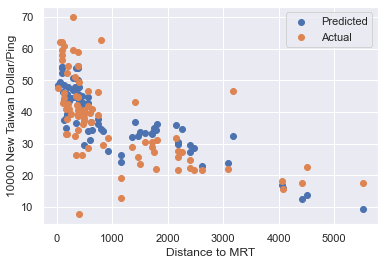

In [180]:
from sklearn.metrics import mean_squared_error, r2_score
# Returns R^2 value\
print(r2_score(y_test,y_prediction), mean_squared_error(y_test,y_prediction))
plt.scatter(x=X_test['X3-D-MRT'],y=y_prediction , label='Predicted')
plt.scatter(x=X_test['X3-D-MRT'],y=y_test, label='Actual')
plt.ylabel("10000 New Taiwan Dollar/Ping")
plt.xlabel("Distance to MRT")
plt.legend()

Cross validation

In [181]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits=k)
result = cross_val_score(regr , X, y, cv = kf)

print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.6142967837014083


In [188]:
X_trimmed = df[['X3-D-MRT' ,'X5-Lat' ,'X6-Lon']]
result = cross_val_score(regr , X_trimmed, y, cv = kf)
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.5059018459474837


In [183]:
from sklearn.svm import SVR
regSvm = SVR()
regSvm.fit(X_train, y_train)
result = cross_val_score(regSvm , X, y, cv = kf)
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.5235716959098822


In [184]:
from sklearn import linear_model
bayReg = linear_model.BayesianRidge()
regSvm.fit(X_train, y_train)
result = cross_val_score(bayReg , X, y, cv = kf)
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.5812611885480764


In [185]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor()
knn.fit(X_train, y_train)
result = cross_val_score(knn , X, y, cv = kf)
print("Avg accuracy: {}".format(result.mean()))


Avg accuracy: 0.6683772653809154


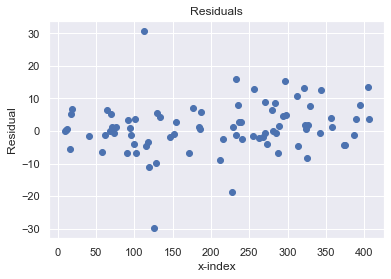

In [186]:
y_prediction = knn.predict(X_test)
difKnn = y_prediction - y_test
plt.scatter(X_test.index,difKnn , label='Predicted')
plt.title("Residuals")
plt.ylabel("Residual")
plt.xlabel("x-index")
plt.show()